In [5]:
import rosbag
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [28]:
bag = rosbag.Bag('../bag/run1.bag')

In [29]:
topic = '/car1/rc_cmd/steer'
df = pd.DataFrame(columns=['data'])

i = 0
for topic, msg, t in bag.read_messages(topics=[topic]):
    data = msg.data
    df = df.append({'data': data}, ignore_index=True)
    i += 1

In [30]:
df = df.astype(float)
df = df.groupby(df.index // 4).mean()

In [31]:
df = ((df - 1500) / 400)[:4733]
df.to_csv('test_steer.csv')

In [32]:
mdf = pd.read_csv('test_steer.csv')
        

In [33]:
len(mdf)

4733

<AxesSubplot:>

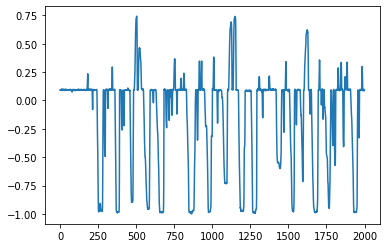

In [34]:
mdf.data[:2000].plot()